<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import scipy
# import statsmodels.api as sm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/'My Drive'/amex

/content/drive/My Drive/amex


In [0]:
airline=pd.read_csv('airline.csv',index_col='Month',parse_dates=True)

In [0]:
airline=airline.dropna()
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
result=seasonal_decompose(airline['Passengers'],model="multiplicative")

In [0]:
result


Data has people travelling from 1949 to 1960.

In [0]:
result.trend.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Passengers, dtype: float64

In [0]:
result.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Passengers, dtype: float64

In [0]:
result.resid.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Passengers, dtype: float64

# **ETS Graph Decomposition** explained:-
* **Trend**:- There is an increase in trend.
* **Seasonal**- Remove trend and see the seasonality.
* **Residual - Noise -** Cant explain by above two. There is slightly more noise in the starting of the dataset than at the ending of the dataset

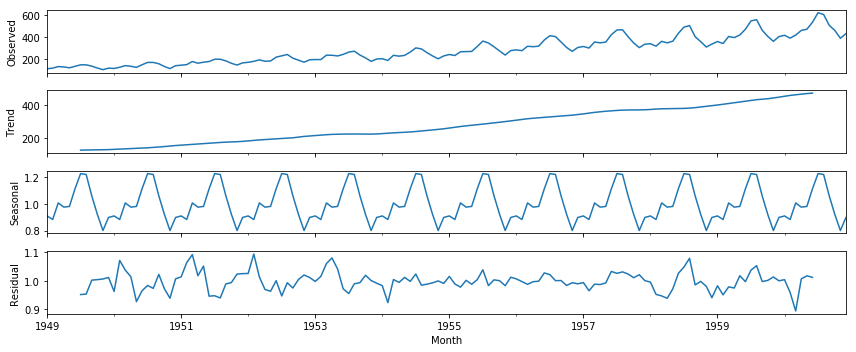

In [0]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot();

***Two types of ETS models***:-
  * Additive :- additive model is applied when trend is more linear and seasonality and trend components seems to be very constant over time.
  * Multiplicative :- Multiplicative model is appropriate when we are increasing and decreasing at a non-linear rate. (Double the amt of passengers.)  

***Exponentialy Weigted Moving Average(EWMA) VS Simple Moving Average(SMA)***
* **SMA**:- Smaller windows will have more noise than signals. and it will always lag by window size. Mostly describes trend in data.
* **EWMA**:-Recent data is more reflective of feature results and hence would be given more weightage.

# **Simple Moving Average implementation**

In [0]:
airline['6 mth SMA']=airline['Passengers'].rolling(window=6).mean()
airline['12 mth SMA']=airline['Passengers'].rolling(window=12).mean()

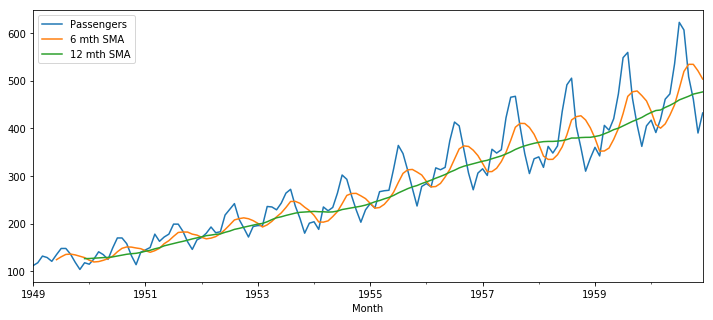

In [0]:
airline.plot()

# ***EWMA implemenation***

In [0]:
airline['EWMA-12']=airline['Passengers'].ewm(span=12).mean()

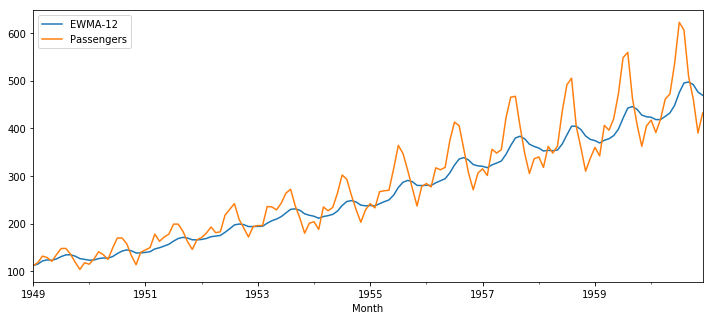

In [0]:
airline[['EWMA-12','Passengers']].plot()
# The behaviour at the beginning is pretty differenet than at the end for the EWMA model.

# **Holt-Winter's Model**

Trend and seasonality werent taken into account for EWMA. Hence holt's winter method.

* HW method consists of the forecast equation in addition to 3 smoothing equations.
*  1 is for level . (alpha)
* 1 is for trend .(beta)
* 1 is for seasonal compenent. (gamma)


* ADditive method is preferred when the seasonal variations are roughly constant through the series.
* Multiplicative  method is preferred when the seasonal variations are changing proportional to the level of the  series.



**Holt Winter divided into two parts:-**
* Double exponential smoothin(Level +Trend)
* Triple  exponential smoothin(Level+Trend+Seasonality)

In [0]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [0]:
airline=pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
airline=airline.dropna()

In [0]:
model=SimpleExpSmoothing(airline['Passengers'])
fitted_model=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [0]:
airline['SimpleExpSmoothing']=fitted_model.fittedvalues

In [0]:
airline.tail()

,Passengers,SimpleExpSmoothing
Month,,
1960-08-01,606,622.0
1960-09-01,508,606.0
1960-10-01,461,508.0
1960-11-01,390,461.0
1960-12-01,432,390.0
